<a href="https://colab.research.google.com/github/RidhoAnfaal/MachineLearning/blob/main/QUIZ1_2341720222_Ridho_Anfa'al.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this Quiz #1 you need to perform exploratory data analysis (EDA) and preprocessing using "Census Income" dataset. The dataset is tabular data which has several missing value in some variables. Moreover, you may need to adjust the name of variables (if needed).

To guide you through this task, some code has beed provided including, download the data, loading the data, and metadata inspection.

# Load Data and Inspect Metadata

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from tensorflow.image import resize

In [ ]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [ ]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Data Size
df.shape

(48842, 15)

In [ ]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Part 1 - Data Loading dan Data Imputation

## Task 1 (5 points)
1.   Do inspection to get the information about dataset
2.   **Which variable(s)** has **missing values**? **How many is it**?



In [ ]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed
print("Dataset Info: ")
df.info()

print("\nMissing Values: ")
print(df.isnull().sum())

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

Missing Values: 
age                 0
workclass         963
fnlwgt          

## Task 2 (5 points)
1. Perform data imputation on missing values.
2. Verified the missing values for each variable. Is it still there?

In [ ]:
# Answer task 2 using this cell
# You can add another cell after this cell if needed
missing_col = ['workclass', 'occupation', 'native-country']

for col in missing_col:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

print("\nMissing Values: ")
print(df.isnull().sum())


Missing Values: 
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
sex_encoded       0
income_encoded    0
dtype: int64


## Task 3 (10 points)
Do inspection to all the quantitative variables (features). If you found an **inappropriate value(s)**, replace it with '**Others**'. Also, if you found any typos value(s), **fix the typos**.

In [ ]:
# Answer task 3 using this cell
# You can add another cell after this cell if needed
print(df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].describe())

# replace inappropriate var
df.loc[df['age'] <= 0, 'age'] = np.nan
df.loc[df['hours-per-week'] <= 0, 'hours-per-week'] = np.nan
df.loc[df['hours-per-week'] > 100, 'hours-per-week'] = np.nan

df.loc[df['capital-gain'] < 0, 'capital-gain'] = np.nan
df.loc[df['capital-loss'] < 0, 'capital-loss'] = np.nan

for col in ['age','hours-per-week','capital-gain','capital-loss']:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

print("\nsex column now:")
print(df['sex'].unique())

print("\nworkclass column now:")
print(df['workclass'].unique())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

sex column now:
['Male' 'Female']

workclass column now:
['Sta

# Part 2 - Visual Inspection



## Task 1 - Data Visualization (20 points)
Do inspection on this following variabels,
1. On the 'age' by using a histogram
2. On the 'education' using a barchart
3. On the 'income' to 'hours_per_week' by using a boxplot (grouped by income)
4. On the 'age' to 'capital-gain' and 'capital-loss' using lineplot (lineplot with multiple x-data)

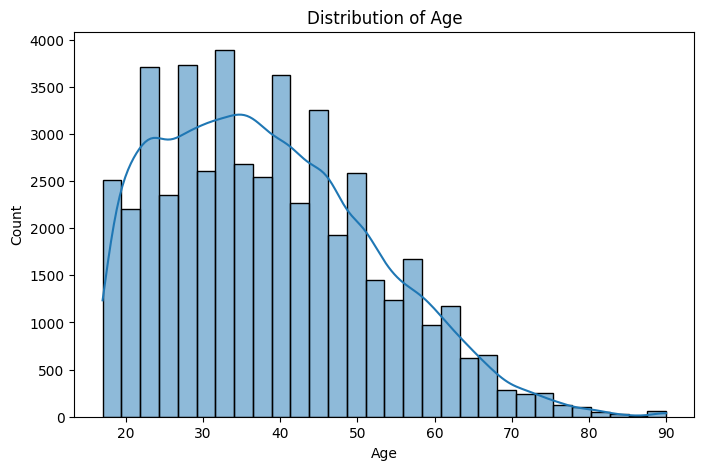

In [ ]:
# Answer 1.1 - Histrogram
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

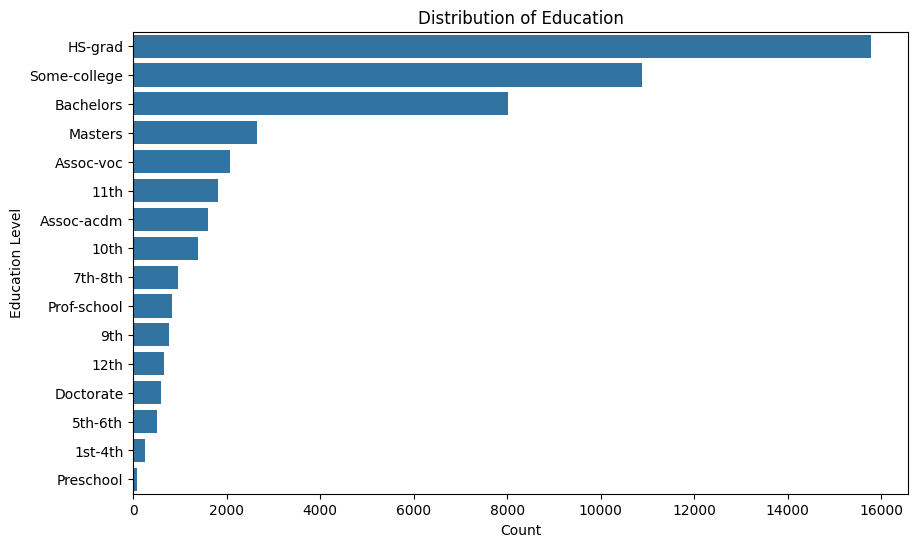

In [ ]:
# Answer 1.2 - Barchart
plt.figure(figsize=(10,6))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Distribution of Education')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

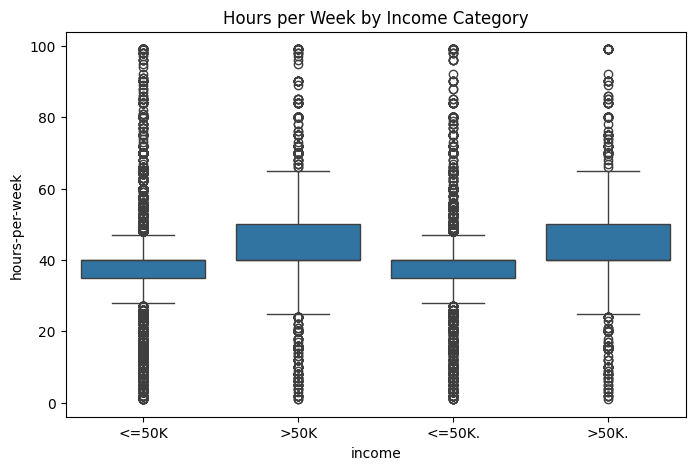

In [ ]:
# Answer 1.3 - Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours per Week by Income Category')
plt.show()

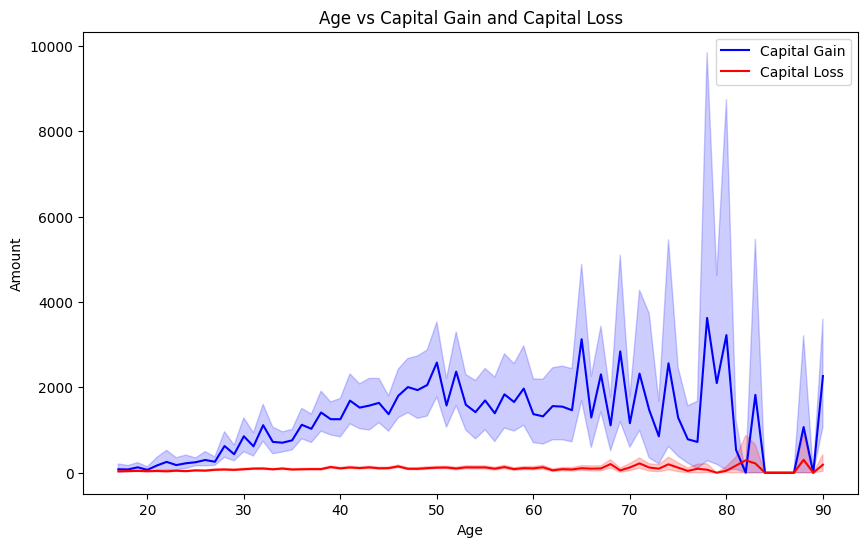

In [ ]:
# Answer 1.4 - Lineplot
plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='capital-gain', data=df, label='Capital Gain', color='blue')
sns.lineplot(x='age', y='capital-loss', data=df, label='Capital Loss', color='red')
plt.title('Age vs Capital Gain and Capital Loss')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend()
plt.show()

## Task 2 - Visual Analysis (15 points)
1. What kind of distribution showed in 'age'?
2. If you find missing values in 'age', what kind of data impute method will you use? Why?
3. How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?

In [ ]:
# Answer with python comment like this -> inline comment

'''
1. From the histogram age is right skewed because most paople data are between 20-45 with fewer older individuals. It's not normal because it resembles a skewed unimodal distribution.
2. Since age is numeric with skewness I'll use median, because is more robust against outliers than mean.
3. Groups with <=50k & >50k have more outlier, people working >80 hours per week. <=50k group usually has more outliers, since more people in the dataset fall into this group overall.
'''

"\n1. From the histogram age is right skewed because most paople data are between 20-45 with fewer older individuals. It's not normal because it resembles a skewed unimodal distribution.\n2. Since age is numeric with skewness I'll use median, because is more robust against outliers than mean.\n3. Groups with <=50k & >50k have more outlier, people working >80 hours per week. <=50k group usually has more outliers, since more people in the dataset fall into this group overall.\n"

# Part 3 - Encoding in Categorical Variable

## Task 1 (5 points)
Do encoding process on 'Sex' and 'Income', while 'Income' is target variable.

In [ ]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed
sex = LabelEncoder()
df['sex_encoded'] = sex.fit_transform(df['sex'])

income = LabelEncoder()
df['income_encoded'] = income.fit_transform(df['income'])

print("Original 'sex' categories:", df['sex'].unique())
print("Encoded 'sex' categories:", df['sex_encoded'].unique())
print("Original 'income' categories:", df['income'].unique())
print("Encoded 'income' categories:", df['income_encoded'].unique())

print(df[['sex', 'sex_encoded', 'income', 'income_encoded']].head())

Original 'sex' categories: ['Male' 'Female']
Encoded 'sex' categories: [1 0]
Original 'income' categories: ['<=50K' '>50K' '<=50K.' '>50K.']
Encoded 'income' categories: [0 2 1 3]
      sex  sex_encoded income  income_encoded
0    Male            1  <=50K               0
1    Male            1  <=50K               0
2    Male            1  <=50K               0
3    Male            1  <=50K               0
4  Female            0  <=50K               0


# Part 4 - Correlation Analysis

## Task 1 (10 points)
1. Do correlation analysis on the following variabels: 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', and 'income' (encoded version from previous task)
2. Based on the result, what kind of information you get?

Correlation Matrix:
                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income_encoded  0.205173       0.291074        0.198890      0.195755   

                capital-loss  income_encoded  
age                 0.056944        0.205173  
education-num       0.080972        0.291074  
hours-per-week      0.054467        0.198890  
capital-gain       -0.031441        0.195755  
capital-loss        1.000000        0.129771  
income_encoded      0.129771        1.000000  


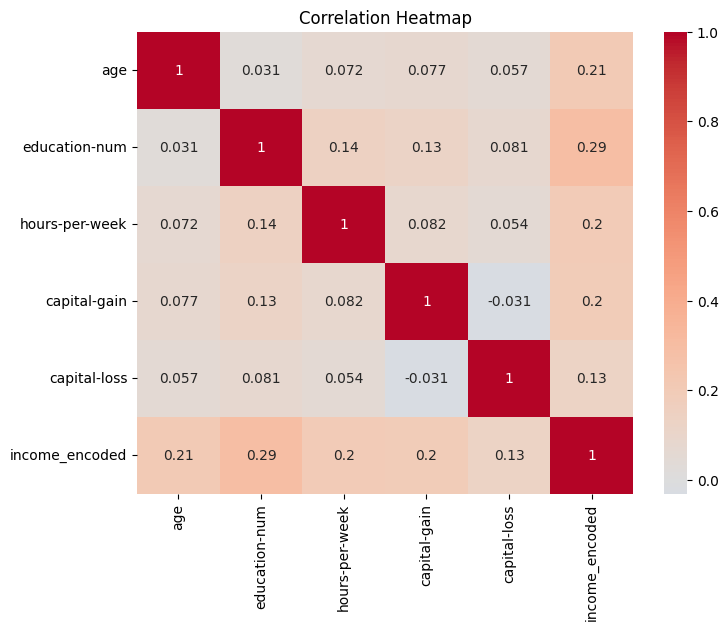

In [ ]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed
corr_vars = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income_encoded']
corr_matrix = df[corr_vars].corr()

print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Answer task 2 using this cell -> you can use multiple comments style too
'''
Based on results it shows that education level, age, hours worked, & capital gain are positively correlated with income, among them education-num 0.29 is the strongest factor. suggesting that education is a key determinant of higher income.
'''

'\nBased on results it shows that education level, age, hours worked, & capital gain are positively correlated with income, among them education-num 0.29 is the strongest factor. suggesting that education is a key determinant of higher income.\n'

# Part 5 - Preprocessing on MNIST Dataset

In this part, you need to perform EDA and simple preprocessing on MNIST dataset. This dataset contain images of handwritten digit from 0 to 9. A pre configuration is provided to help you to load the data and inspect some images.

Hints:
1. You only need to use the **Test** set.
2. You need to perform to all of images in test set (10k images). You may need a function to complete this task (optional).

In [ ]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


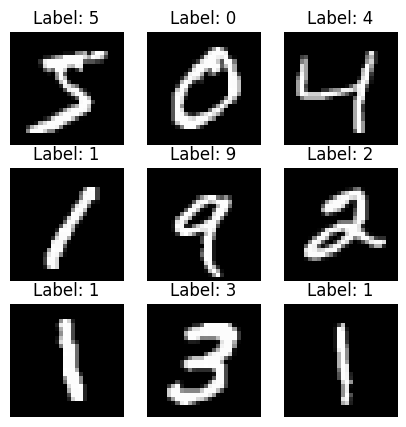

In [ ]:
# Visual Inspection
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Task 1 (10 points)
1. Perform **upsampling** on the images to 32x32
2. Show the 5 sample of the result.


Hint: You need to store the result in an empty array. Replacing data to the  **X_test** cannot be done due to the shape of the array (10000, (28,28)). You need to create an array which match with the size of the new images.

original shape of X_test: (10000, 28, 28)
new shape after resizing: (10000, 32, 32)


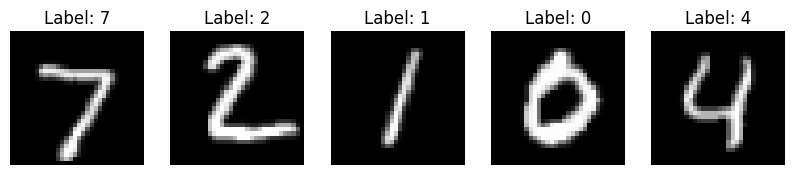

In [ ]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed
print("original shape of X_test:", X_test.shape)

X_test_resized = np.zeros((X_test.shape[0], 32, 32))

for i in range(X_test.shape[0]):
    X_test_resized[i] = resize(np.expand_dims(X_test[i], axis=-1), (32, 32)).numpy().squeeze()

print("new shape after resizing:", X_test_resized.shape)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_resized[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Label: {y_test[i]}")
plt.show()

## Task 2 (10 points)
Perform normalization, so the pixel value will have a value in range of 0 until 1

In [ ]:
# Answer task 2 using this cell
# You can add another cell after this cell if needed
X_test_norm = X_test_resized / 255.0

print("min value:", X_test_norm.min())
print("max value:", X_test_norm.max())

min value: 0.0
max value: 1.0


## Task 3 (10 points)
Transform / reshape the images into 1 dimensional array. Do it to the all images (after resizing and normalization).

Hint: You may need an empty array to store the result

Shape after flattening: (10000, 1024)


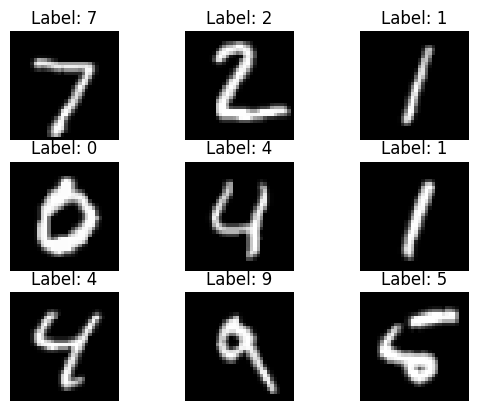

In [ ]:
# Answer task 3 using this cell
# You can add another cell after this cell if needed
X_test_flattened = X_test_norm.reshape(X_test_norm.shape[0], -1)

print("Shape after flattening:", X_test_flattened.shape)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test_flattened[i].reshape(32, 32), cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {y_test[i]}")
plt.show()